In [1]:
library(vegan)
library(tidyverse)
library(PCAtools)
library(recluster)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-8

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: ggrepel


Attaching package: ‘PCAtools’


The following object is masked from ‘package:vegan’:

    pca


The following objects are masked from ‘package:stats’:

    biplot, screeplot


Loading required package: ape


Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where




In [2]:
load("AB332_lab_I.RData")

In [5]:
otu.tab.trans.ss.nozero.bray <- vegdist(otu.tab.trans.ss.nozero, method = "bray")
as.matrix(otu.tab.trans.ss.nozero.bray)[1:5, 1:5]

,Isa_120223,Isa_120301,Isa_120308,Isa_120320,Isa_120321
Isa_120223,0.0000000,0.3075050,0.2727474,0.2959929,0.2980592
Isa_120301,0.3075050,0.0000000,0.2494281,0.2085455,0.2134160
Isa_120308,0.2727474,0.2494281,0.0000000,0.2684673,0.2957715
Isa_120320,0.2959929,0.2085455,0.2684673,0.0000000,0.1388089
Isa_120321,0.2980592,0.2134160,0.2957715,0.1388089,0.0000000


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_label_repel()`).”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


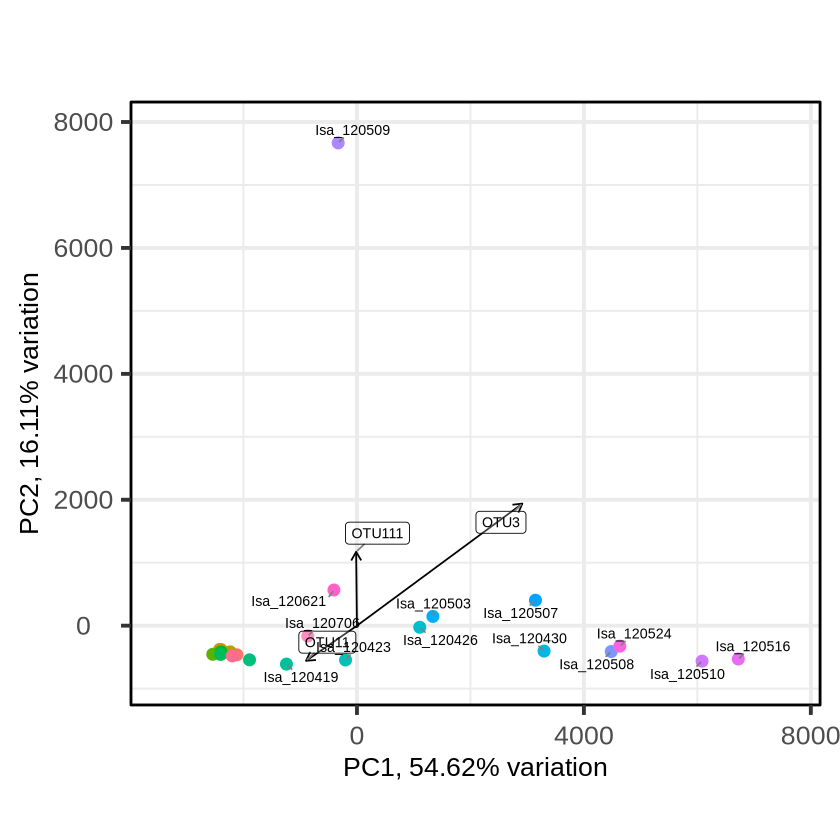

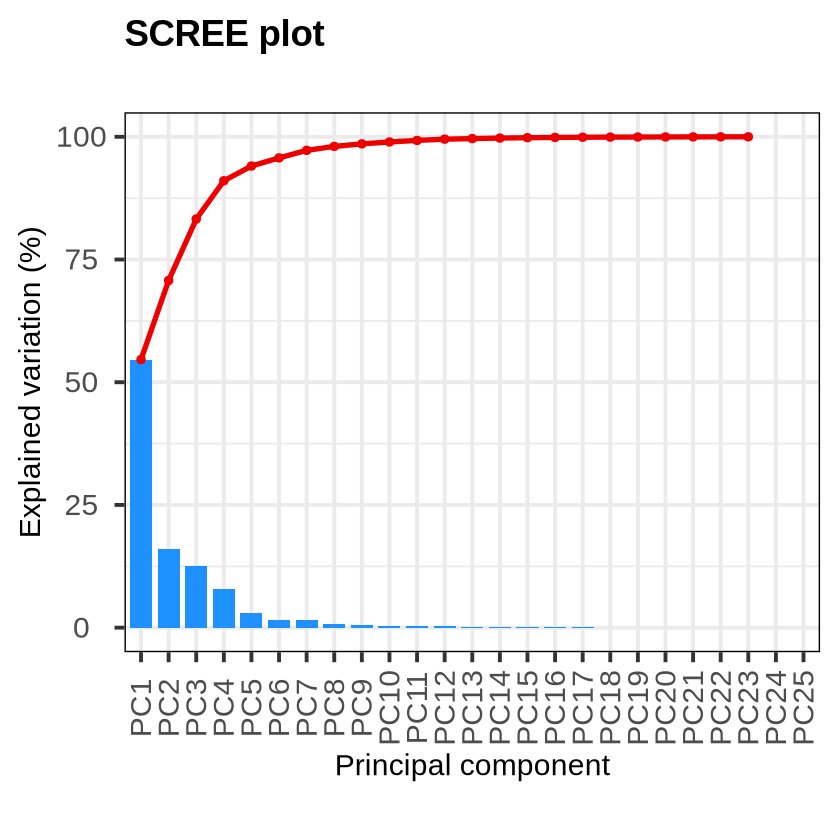

In [6]:
otu.tab.trans.ss.nozero.pca <- PCAtools::pca(t(otu.tab.trans.ss.nozero), scale = FALSE) # Runs de PCA
biplot(otu.tab.trans.ss.nozero.pca, showLoadings = T, lab = rownames(otu.tab.trans.ss.nozero)) # Plots the PCA
screeplot(otu.tab.trans.ss.nozero.pca, axisLabSize = 18, titleLabSize = 22) # We plot the percentage of variance explained by each axis

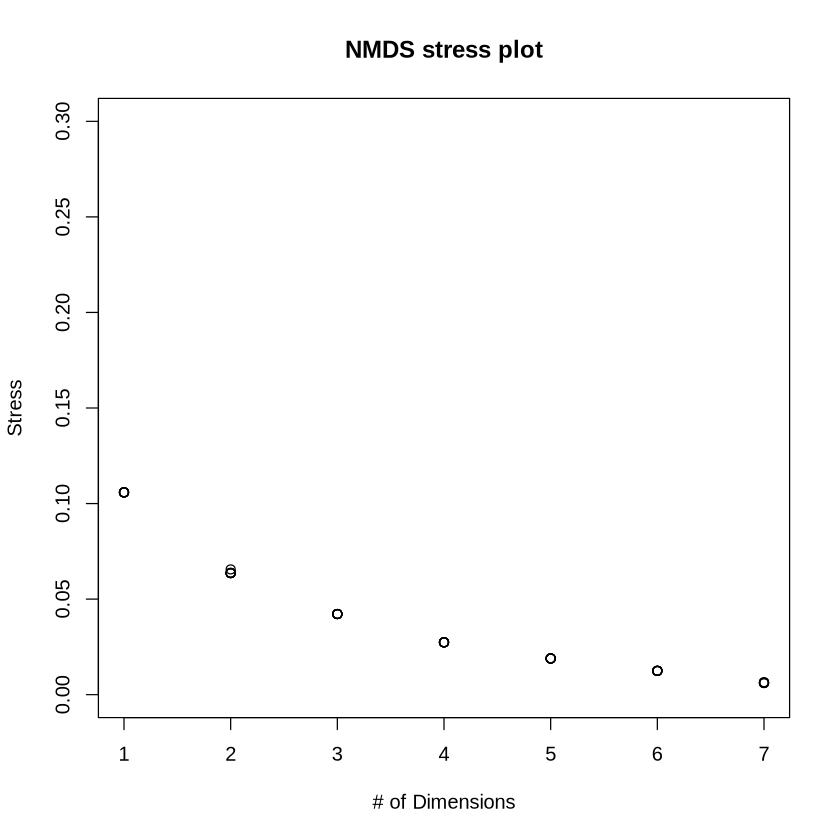

In [11]:
set.seed(666) # Set a seed to make results reproducible
NMDS.scree <- function(x) { # x is the name of the distance matrix
  plot(rep(1, 7), replicate(7, metaMDS(x, autotransform = FALSE, k = 1)$stress), xlim = c(1, 7), ylim = c(0, 0.30), xlab = "# of Dimensions", ylab = "Stress", main = "NMDS stress plot")
  for (i in 1:7) {
    points(rep(i + 1, 7), replicate(7, metaMDS(x, autotransform = FALSE, k = i + 1)$stress))
  }
}

# Set a white background for the plot
par(bg = "white")

# Suppress most output except the graph
invisible(capture.output(NMDS.scree(otu.tab.trans.ss.nozero.bray)))

In [18]:
otu.tab.trans.ss.nozero.bray.nmds <- metaMDS(otu.tab.trans.ss.nozero, k = 2, trymax = 100, trace = FALSE, autotransform = FALSE, distance = "bray")
otu.tab.trans.ss.nozero.bray.nmds


Call:
metaMDS(comm = otu.tab.trans.ss.nozero, distance = "bray", k = 2,      trymax = 100, autotransform = FALSE, trace = FALSE) 

global Multidimensional Scaling using monoMDS

Data:     otu.tab.trans.ss.nozero 
Distance: bray 

Dimensions: 2 
Stress:     0.06460093 
Stress type 1, weak ties
Best solution was repeated 1 time in 20 tries
The best solution was from try 4 (random start)
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘otu.tab.trans.ss.nozero’ 


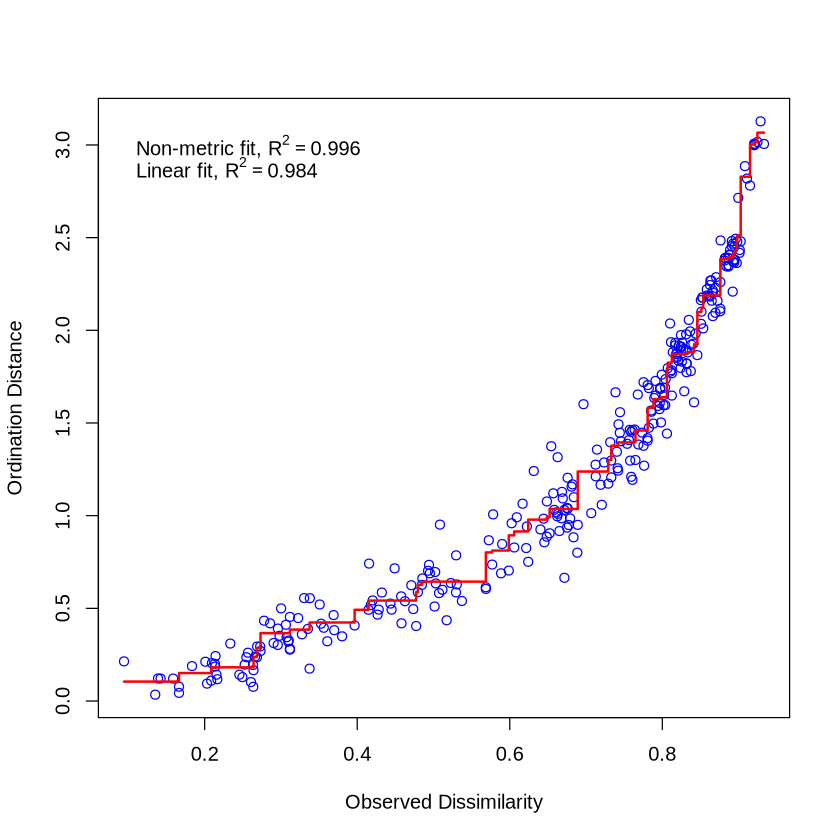

In [31]:
par(bg = "white")
stressplot(otu.tab.trans.ss.nozero.bray.nmds) 

Rows: 82 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Sample_Name, date, seasons
dbl (23): year, season_nr, month, day, DOY, running_day, template, depth, de...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


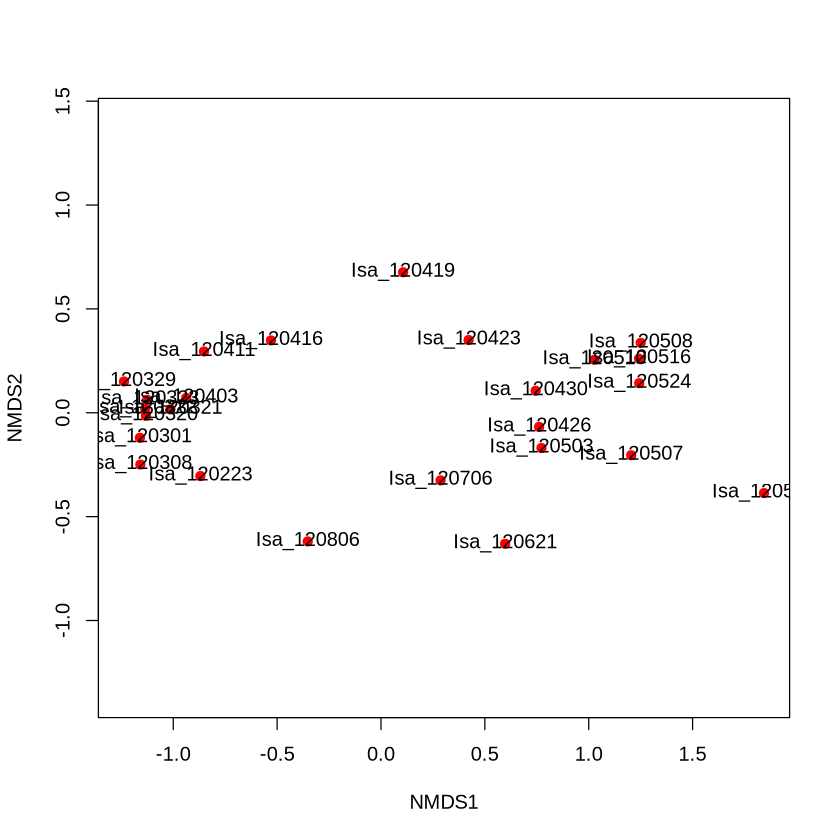

In [23]:
par(bg = "white")
plot(otu.tab.trans.ss.nozero.bray.nmds, display = "sites", type = "n")
points(otu.tab.trans.ss.nozero.bray.nmds, display = "sites", col = "red", pch = 19)
text(otu.tab.trans.ss.nozero.bray.nmds, display = "sites")

isa.metadata <- read_tsv("https://raw.githubusercontent.com/krabberod/UNIS_AB332_2022/main/computer_lab/data/AB332metadata_v3.txt")
isa.metadata <- column_to_rownames(isa.metadata, var = "Sample_Name")
isa.metadata.simp <- isa.metadata[6:30, ]

In [24]:
otu.tab.trans.ss.nozero.bray.nmds.scores <- as.data.frame(scores(otu.tab.trans.ss.nozero.bray.nmds)$sites)
otu.tab.trans.ss.nozero.bray.nmds.scores$season <- isa.metadata.simp$seasons
otu.tab.trans.ss.nozero.bray.nmds.scores$month <- as.factor(isa.metadata.simp$month)
otu.tab.trans.ss.nozero.bray.nmds.scores$samples <- rownames(otu.tab.trans.ss.nozero.bray.nmds.scores)

Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


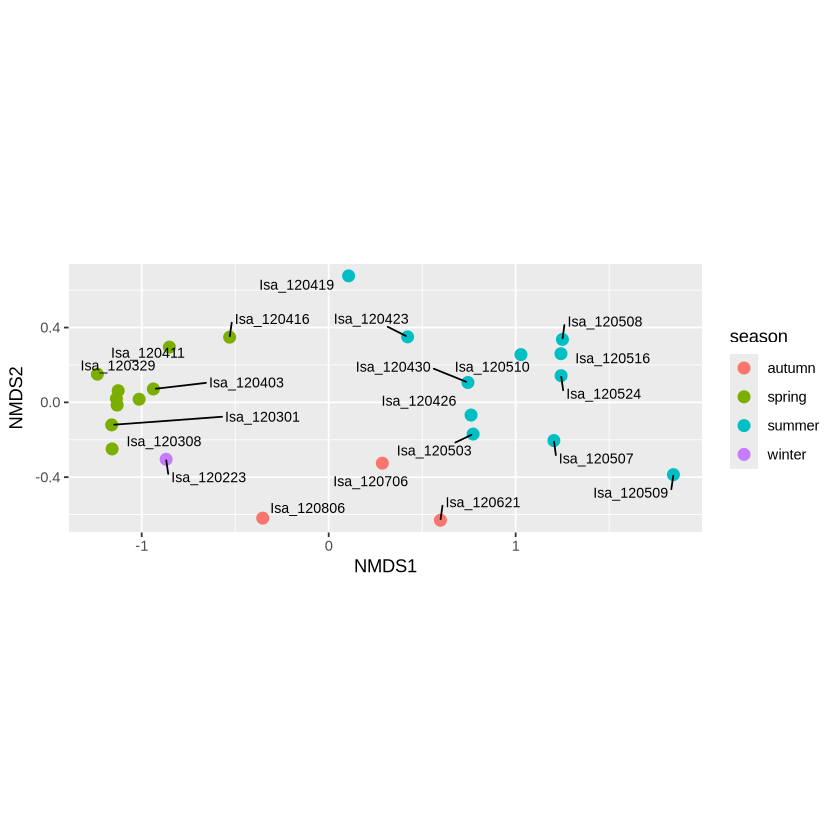

In [25]:
ggplot(otu.tab.trans.ss.nozero.bray.nmds.scores) +
  geom_point(mapping = aes(x = NMDS1, y = NMDS2, colour = season), size = 3) +
  coord_fixed() + ## need aspect ratio of 1!
  geom_text_repel(
    box.padding = 0.5, aes(x = NMDS1, y = NMDS2, label = samples),
    size = 3
  )

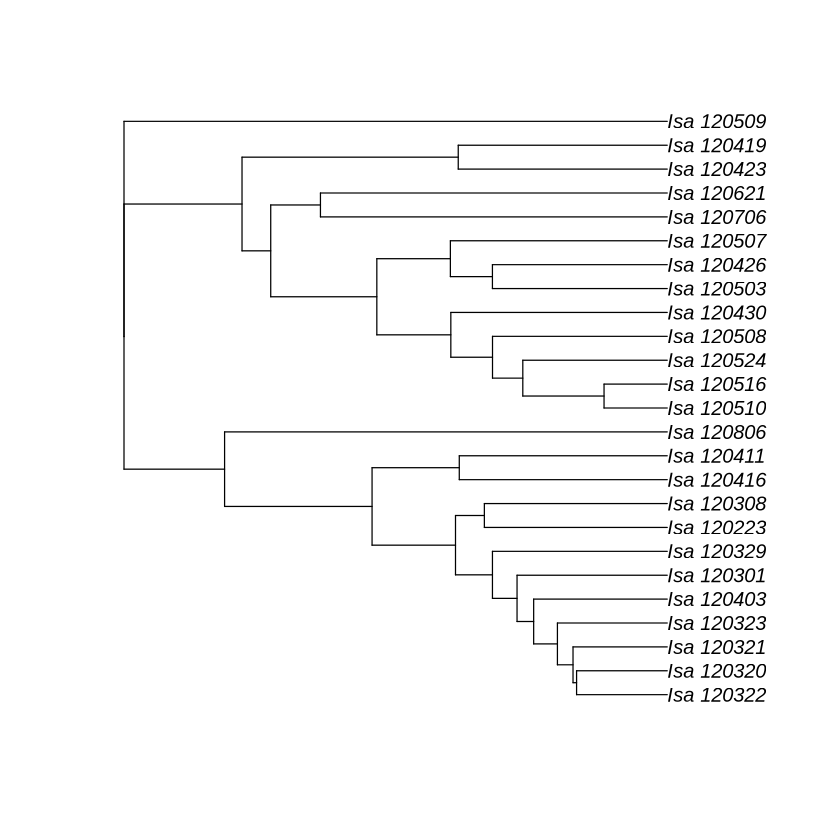

In [27]:
par(bg = "white")
otu.tab.trans.ss.nozero.bray.upgma <- recluster.cons(otu.tab.trans.ss.nozero.bray, tr = 100, p = 0.5, method = "average")
plot(otu.tab.trans.ss.nozero.bray.upgma$cons) # plot consensus tree

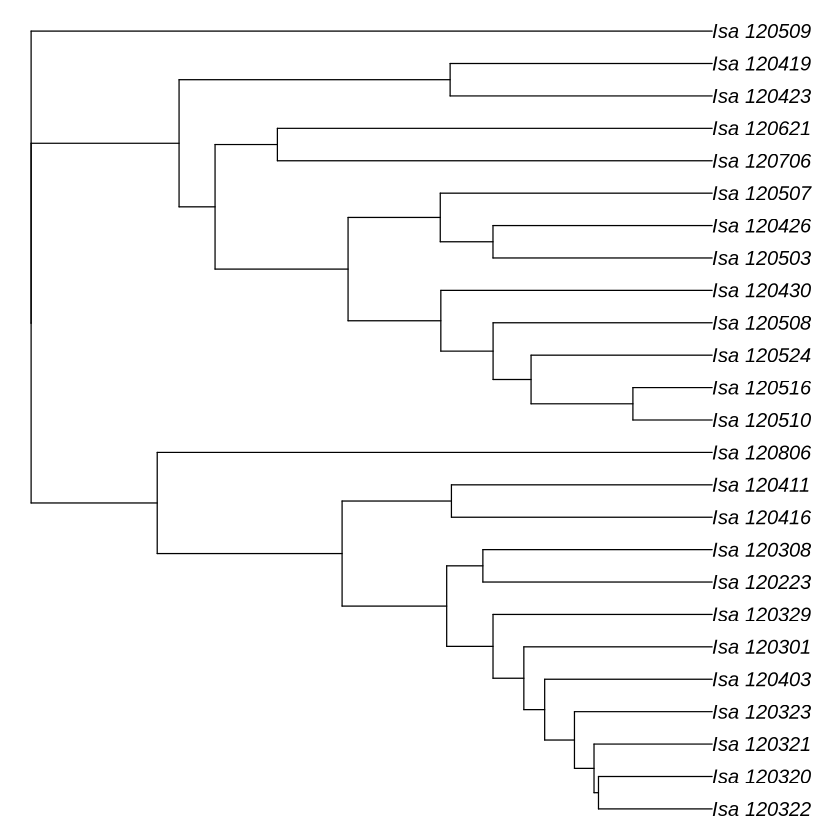

In [29]:
par(bg = "white")
otu.tab.trans.ss.nozero.bray.upgma.boot <- recluster.boot(otu.tab.trans.ss.nozero.bray.upgma$cons, otu.tab.trans.ss.nozero, tr = 100, p = 0.5, method = "average", boot = 1000, level = 1)
recluster.plot(otu.tab.trans.ss.nozero.bray.upgma$cons, otu.tab.trans.ss.nozero.bray.upgma.boot, direction="right") # We add bootstrap values to the branching pattern

In [30]:
save.image("AB332_lab_II.RData")

# Questions

- Why do we want to reduce the dimensionality - so that we can visualise it?
    - IF i want to make accurate predictions, i.e. with an ML model, I don't necessarily want to reduce dimensions. I want to reduce noise. I want to chose features that are most predictive. Does that mean they explain the variance? Or maintain the dissimilarity? 
- Are we saying if we rarify the OTU table we can compare abundances across samples? Given the same lab method.
    Are there other techniques? Which is the best?
- 